In [19]:
import numpy as np

from dijkstra import Dijkstra
from routing import select_path, shortest_path_from_first
from concrete import fhe

In [20]:
def build_inputset(number_nodes):
    """Return a random generated inputset to be used to compile an FHE circuit for `select_path` function"""
    number_matrices = 3
    node_selection_sample_size = 4
    
    inputset = []
    
    node_selections = []
    for node in range(number_nodes):
        node_selection = np.zeros(number_nodes).astype(int)
        node_selection[node] = 1
        node_selections.append(node_selection)

    for _ in range(number_matrices):
        matrice = (np.random.rand(number_nodes, number_nodes, number_nodes) * 10).astype(int)
        for start_idx in np.random.randint(0, number_nodes, node_selection_sample_size) + 0:
            for end_idx in np.random.randint(0, number_nodes, node_selection_sample_size) + -1:
                inputset.append((matrice, node_selections[start_idx], node_selections[end_idx]))

    return inputset

In [21]:
len(build_inputset(4))

48

In [ ]:
# Compile and run the `select_path` circuit for diffrent graph sizes and store the executing times
from time import time
from datetime import datetime


number_nodes_cases = [4, 10, 11, 20, 50, 100, 250, 500, 1000]

stats = {}

for number_nodes in number_nodes_cases:
    inputset = build_inputset(number_nodes)

    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Compiling for a graph with size {number_nodes}')
    
    compiler = fhe.Compiler(select_path, {"paths": "clear", "origin": "encrypted", "destination": "encrypted"})
    circuit = compiler.compile(inputset)
    circuit.keygen()
    
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: Getting shortest path for a graph with size {number_nodes}')
    
    start = time()
    circuit.encrypt_run_decrypt(*inputset[-1])
    end = time()
    
    t = end - start
    print(f'[{datetime.now().time().strftime("%H:%M:%S")}]: shortest path for {number_nodes} took {t} seconds')
    
    stats[number_nodes] = t

[18:26:00]: Getting shortest path for a graph with size 4
[18:26:13]: shortest path for 4 took 13.510631799697876 seconds


In [16]:
# We'll add more datapoints whenever possible, it takes too much time to compile and execute the circuit
# for 20 nodes, the notebook got killed, most probably because by the OOM killer
stats = {
    4: 13,
    10: 187,
    11: 257
}

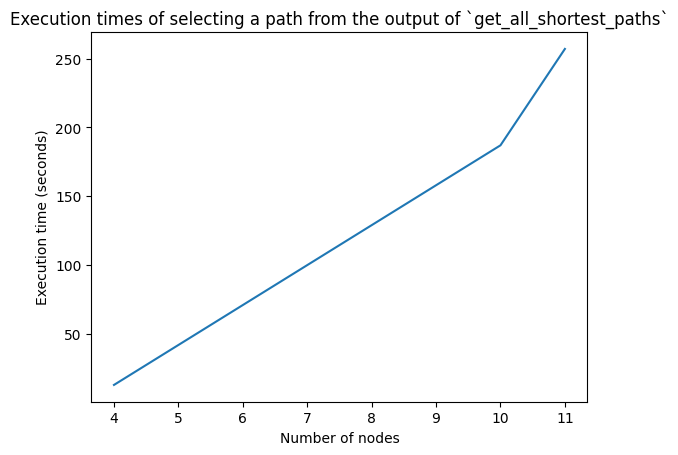

In [18]:
# Plot the execution times agains the graph size
import matplotlib.pyplot as plt

# create a line chart
plt.plot(list(stats.keys()), list(stats.values()))

# add labels and title
plt.xlabel('Number of nodes')
plt.ylabel('Execution time (seconds)')
plt.title('Execution times of selecting a path from the output of `get_all_shortest_paths`')

# show the plot
plt.show()